install & import libraries

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet



Fetch stock Data


In [18]:
stock = yf.Ticker("AAPL")
data = stock.history(period="5y")

# Reset index and save to CSV
data.reset_index(inplace=True)
data.to_csv("AAPL_5y.csv", index=False)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-30 00:00:00-04:00,91.556778,93.607845,91.148511,93.503349,158130000,0.0,0.0
1,2020-07-31 00:00:00-04:00,100.011328,103.442730,98.008860,103.292061,374336800,0.0,0.0
2,2020-08-03 00:00:00-04:00,105.177864,108.519351,104.878957,105.894768,308151200,0.0,0.0
3,2020-08-04 00:00:00-04:00,106.084331,107.695537,105.360137,106.601959,173071600,0.0,0.0
4,2020-08-05 00:00:00-04:00,106.322485,107.309134,105.855889,106.988350,121776800,0.0,0.0


# Clean Data

In [19]:
df = pd.read_csv("AAPL_5y.csv", parse_dates=["Date"])

# Fix timezone-aware datetime
df["Date"] = pd.to_datetime(df["Date"], utc=True)
df["Date"] = df["Date"].dt.tz_convert(None)

df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-07-30 04:00:00,91.556778,93.607845,91.148511,93.503349,158130000
1,2020-07-31 04:00:00,100.011328,103.442730,98.008860,103.292061,374336800
2,2020-08-03 04:00:00,105.177864,108.519351,104.878957,105.894768,308151200
3,2020-08-04 04:00:00,106.084331,107.695537,105.360137,106.601959,173071600
4,2020-08-05 04:00:00,106.322485,107.309134,105.855889,106.988350,121776800


Plot Closing Price Over Time

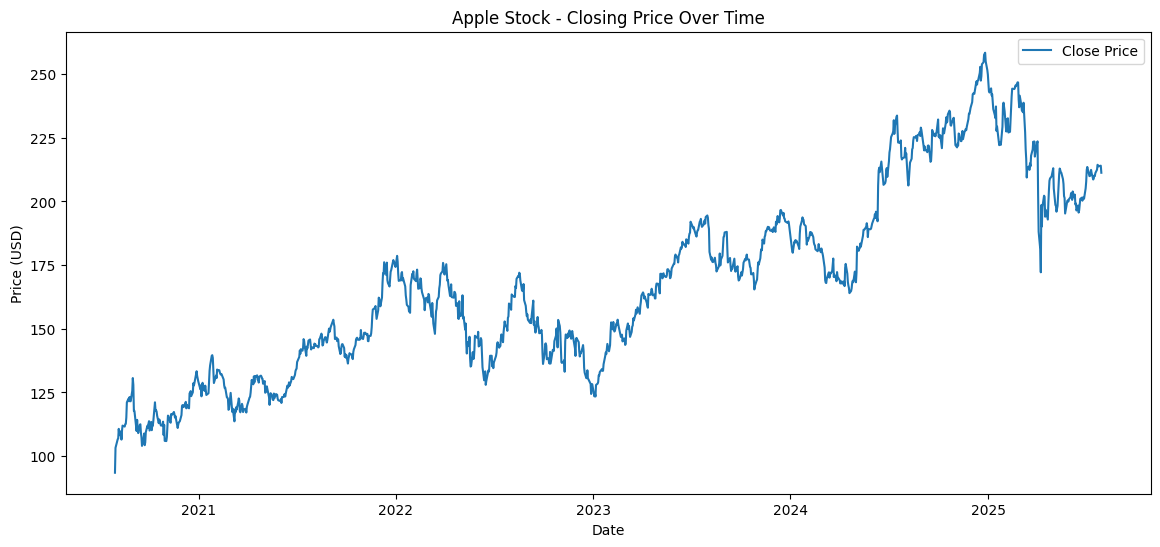

In [20]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.title("Apple Stock - Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

 Add Moving Averages (50 & 200 Days)

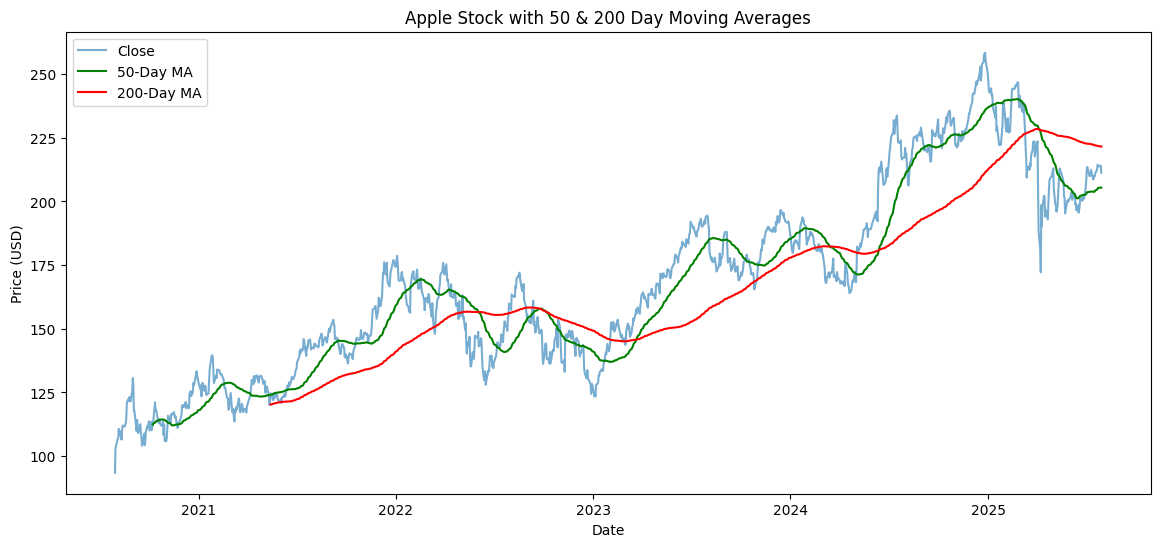

In [21]:
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
plt.plot(df["Date"], df["MA50"], label="50-Day MA", color="green")
plt.plot(df["Date"], df["MA200"], label="200-Day MA", color="red")
plt.title("Apple Stock with 50 & 200 Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

 Forecasting with Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpparvgwe9/ft_249e2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpparvgwe9/7_ghubp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34255', 'data', 'file=/tmp/tmpparvgwe9/ft_249e2.json', 'init=/tmp/tmpparvgwe9/7_ghubp4.json', 'output', 'file=/tmp/tmpparvgwe9/prophet_modelq9xuvcgs/prophet_model-20250730054314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


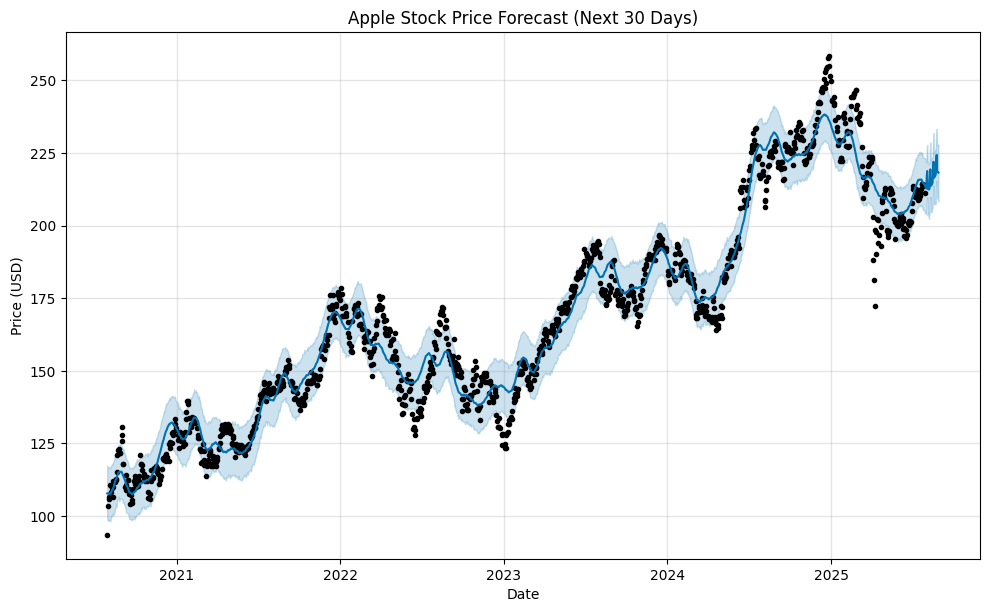

In [22]:
df_prophet = df[["Date", "Close"]].copy()
df_prophet.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Ensure 'ds' is in datetime format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet = df_prophet[df_prophet["ds"].notnull()]
# Create and fit model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Apple Stock Price Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


 Forecast Components

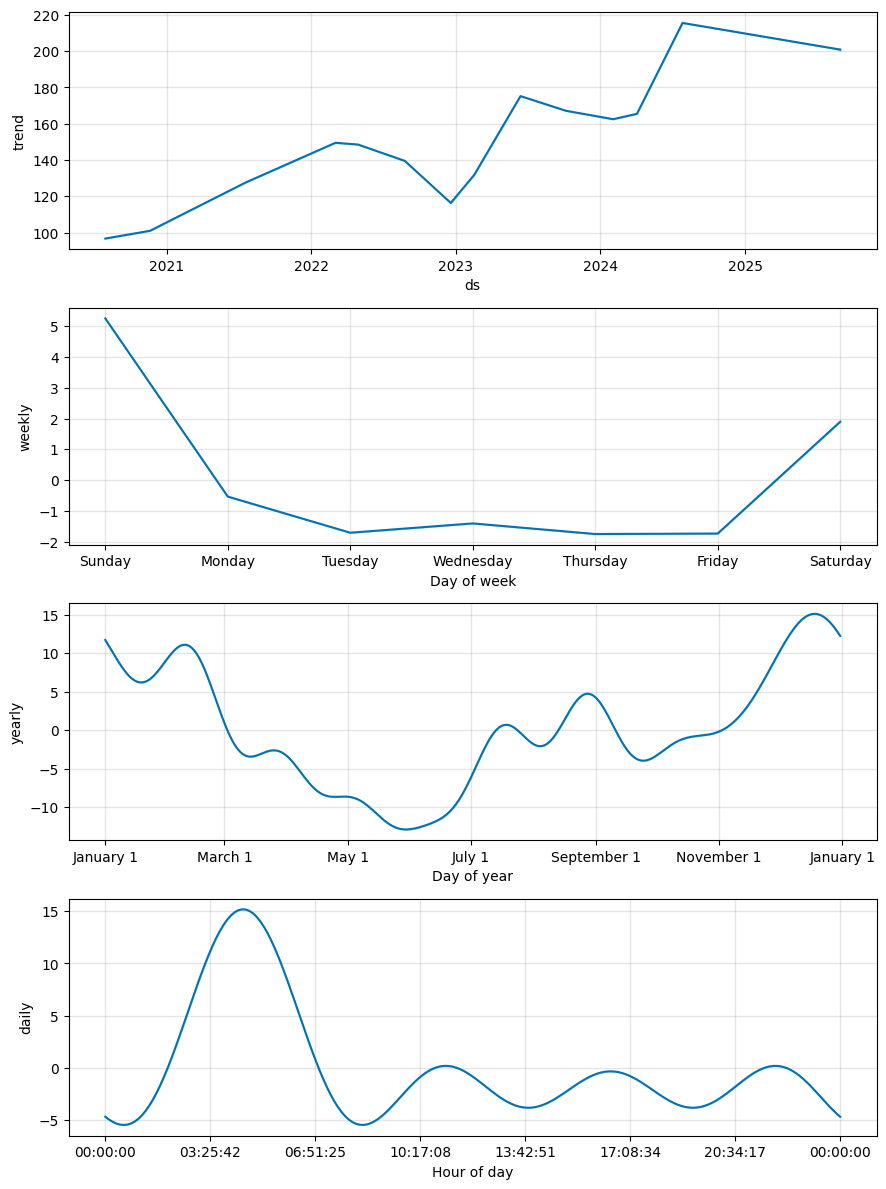

In [23]:
model.plot_components(forecast)
plt.show()

Save Forecast to CSV

In [24]:
forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_result.to_csv("AAPL_forecast.csv", index=False)
print("Forecast saved to AAPL_forecast.csv")

Forecast saved to AAPL_forecast.csv
